# 《Python数据分析》第2次作业

## 说明：本次作业将使用好莱坞（2007-2011）的电影数据进行可视化。本次作业没有“标准答案”，请使用你认为最合理的方式进行可视化，并对结果进行描述和解读。可以使用matplotlib和（或）seaborn，或者其他你喜欢的Python可视化包。

In [1102]:
#基础类
import pandas as pd
import numpy as np


#可视化类
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline 

#系统类
import warnings
warnings.filterwarnings("ignore")

#数据处理类
import fuzzywuzzy
import missingno as msno
from sklearn.impute import SimpleImputer



### 第1题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），对Worldwide Gross这个变量的分布进行可视化，并对可视化结果进行简单描述。（2分）

评分要点：（1）数据可视化之前的缺失值检查；（2）选用的图表是否合适；（3）构图等可视化元素是否合适（包括但并不限于布局、尺度、颜色、标记与线条等，下同）；（4）可视化结果描述是否合理和到位。

In [1103]:

data2011 = pd.read_csv("Most Profitable Hollywood Stories - US 2011.csv")

原始数据集中的空值数量：
1
转换前空值数量： 1
转换后空值数量： 2


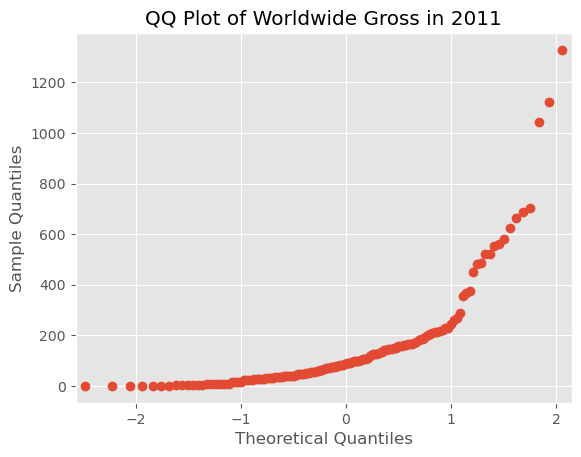

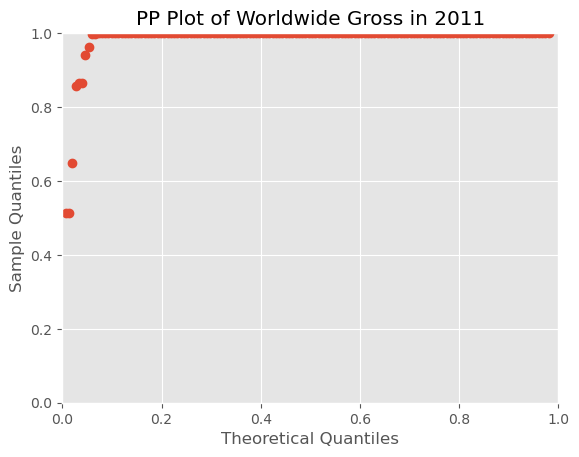

五数概括：
count     148.000000
mean      154.099865
std       212.457622
min         0.030000
25%        33.817500
50%        85.555000
75%       168.312500
max      1328.110000
Name: Worldwide Gross, dtype: float64


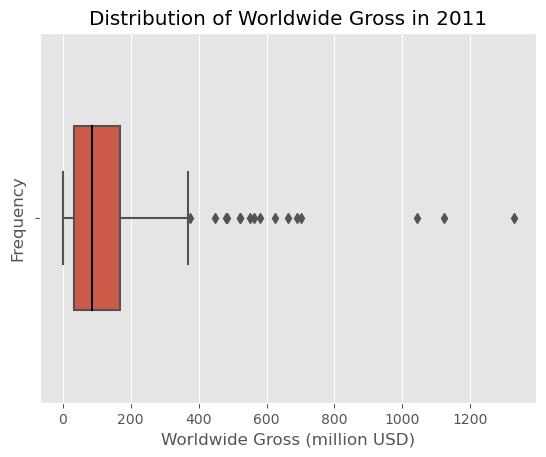

偏度： 2.9366161056978313
峰度： 10.421240681453904


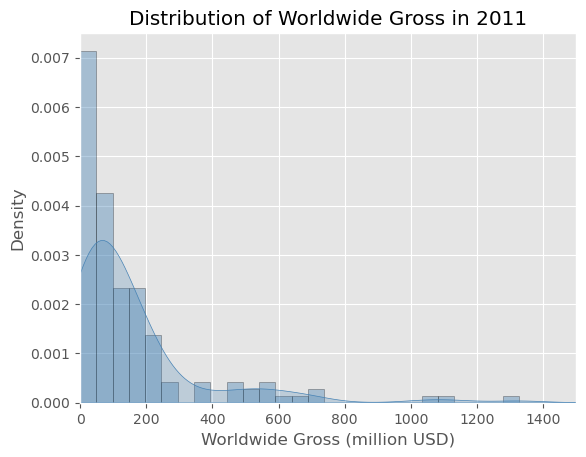

   Rank  Worldwide Gross (million USD)-TopRank
0     1                                1328.11
1     2                                1123.20
2     3                                1043.87
3     4                                 702.17
4     5                                 688.78
5     6                                 663.02
6     7                                 626.13
7     8                                 581.46
8     9                                 562.16
9    10                                 551.85
   Rank  Worldwide Gross (million USD)-ButtomRank
0     1                                      0.03
1     2                                      0.03
2     3                                      0.38
3     4                                      1.07
4     5                                      1.10
5     6                                      1.10
6     7                                      1.57
7     8                                      1.77
8     9                          

In [1104]:



# 缺失值检查
print("原始数据集中的空值数量：")
print(data2011["Worldwide Gross"].isnull().sum())



# 数据类型转换为数值型
gross2011 = data2011["Worldwide Gross"].str.replace(r"\(\$m\)", "", regex=True)
gross2011 = gross2011.str.replace(",", "")
print("转换前空值数量：", gross2011.isnull().sum())
gross2011 = gross2011.replace("", float("nan")).astype(float)
print("转换后空值数量：", gross2011.isnull().sum())


# 可视化


#QQ图
import statsmodels.api as sm
sm.qqplot(gross2011, line="s")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Worldwide Gross in 2011")
plt.show()


#PP图
sm.ProbPlot(gross2011).ppplot(line="s")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("PP Plot of Worldwide Gross in 2011")
plt.show()


# 五数概括
print("五数概括：")
print(gross2011.describe())

# 箱型图
#y为次数,x为数值
sns.boxplot(gross2011, orient="h", width=0.5, linewidth=1.5, fliersize=5, whis=1.5, showmeans=False, showcaps=True, showbox=True, showfliers=True, medianprops={"color":"black"})
plt.xlabel("Worldwide Gross (million USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Worldwide Gross in 2011")
plt.show()

# 偏度与峰度
print("偏度：", gross2011.skew())
print("峰度：", gross2011.kurt())

# 偏度与峰度可视化
sns.distplot(gross2011, hist=True, kde=True, rug=False, color="steelblue", hist_kws={"edgecolor":"black"}, kde_kws={"shade":True})
plt.xlabel("Worldwide Gross (million USD)")
#设置x轴范围
plt.xlim(0, 1500)
plt.ylabel("Density")
plt.title("Distribution of Worldwide Gross in 2011")
plt.show()


#可视化显示最多的10个电影
gross2011 = gross2011.sort_values(ascending=False)
top10 = gross2011.head(10)
top10 = top10.reset_index(drop=True)
top10 = top10.rename("Worldwide Gross (million USD)-TopRank")
top10 = top10.to_frame()
top10["Rank"] = top10.index + 1
top10 = top10[["Rank", "Worldwide Gross (million USD)-TopRank"]]
print(top10)


#可视化显示最少的10个电影
gross2011 = gross2011.sort_values(ascending=True)
bottom10 = gross2011.head(10)
bottom10 = bottom10.reset_index(drop=True)
bottom10 = bottom10.rename("Worldwide Gross (million USD)-ButtomRank")
bottom10 = bottom10.to_frame()
bottom10["Rank"] = bottom10.index + 1
bottom10 = bottom10[["Rank", "Worldwide Gross (million USD)-ButtomRank"]]
print(bottom10)











# PP/QQ图结论
- 从PP/QQ图中可以看出数据集与理论分布不匹配，图像呈现出严重的上凸现象，和直线的偏离程度极大，说明数据集的分布不符合正态分布，数据集中的尾部与理论分布不匹配。初步推测存在长尾分布现象

# 描述可视化结果，描述数据分布的特征
 * 1.数据分布呈右偏态，且峰度较大，说明数据集中在较小的值上，而较大的值较少，说明数据集中的数据大多数都是低收益的电影。
 * 2.数据集中的数据大多数都是低收益的电影，而高收益的电影较少，说明电影行业的竞争激烈，而且电影行业的收益分配不均匀，有的电影收入高达10亿美元以上，有的电影收入仅有数万美元
 * 3.数据的分布呈现出明显的长尾分布，说明电影行业的收益分配不均匀，而且电影行业的竞争激烈。

##                                    分析
- 2011年全球票房收入的分布情况如上。从图像上来看，该分布呈现右偏态，即大部分电影的全球票房收入较低，少数电影的全球票房收入非常高。此外，全球票房收入最高的电影的收入高达10亿美元以上。

### 第2题：请使用2011年的数据，分析不同类型电影产量的比例，分析不同类型电影的得分与总票房情况，并对可视化结果进行简单描述（2分）

评分要点：（1）处理缺失值的方式及理由；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

#### 不同类型电影产量及其比例

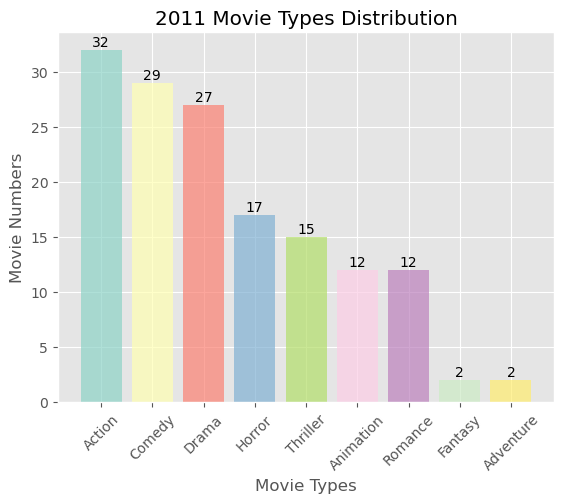

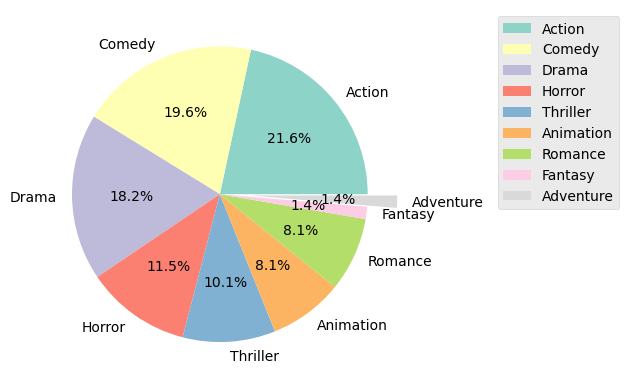

In [1105]:
import numpy as np
Y=data2011["Genre"].value_counts().tolist()
X=data2011["Genre"].value_counts().index.tolist()
#颜色设定为离散化色图
color_list_bar=plt.cm.Set3(np.linspace(0,1,len(X)))
color_list_pie=plt.cm.Set3(range(len(X)))
#设置饼图的分离程度
explode=[0,0,0,0,0,0,0,0,0.2]

#绘制柱状图
plt.bar(X,Y,color=color_list_bar,label=X,alpha=0.7)

#绘制柱状图上的数值标签
for x,y in zip(X,Y):
    plt.text(x,y+0.05,"%.0f"%y,ha="center",va="bottom")



plt.xlabel("Movie Types")
plt.ylabel("Movie Numbers")
plt.xticks(plt.xticks()[0],X,rotation=45)
plt.title("2011 Movie Types Distribution")
plt.show()

#绘制饼图
plt.pie(Y,labels=X,autopct="%1.1f%%",colors=color_list_pie,explode=explode)
plt.legend(loc="upper right",bbox_to_anchor=(1.6,1.0))
plt.show()

width=0.35





# 对结果进行描述分析
-  1.2011年电影类型分布中，动作类电影最多，占比为21.6%，其次是喜剧类电影，占比为19.6%，而冒险类和科幻类电影最少，占比为1.4%。
-  2.可以推测，2011年电影类型分布中，动作类电影最多，喜剧类电影次之，而冒险类和科幻类电影最少，这可能是因为动作类电影的制作成本较低，而喜剧类电影的制作成本较高，而冒险类和科幻类电影的制作成本较高，所以电影制作公司更倾向于制作动作类电影，而不是冒险类和科幻类电影。

### 第3题：请使用2011年的数据，探索，Rotten Tomatoes %与Audience  score %之间的关联；请做可视化，并对可视化结果进行简单的描述。（2分）
评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适；（3）可视化结果描述是否合理和到位。

相关系数：0.8168732822408663


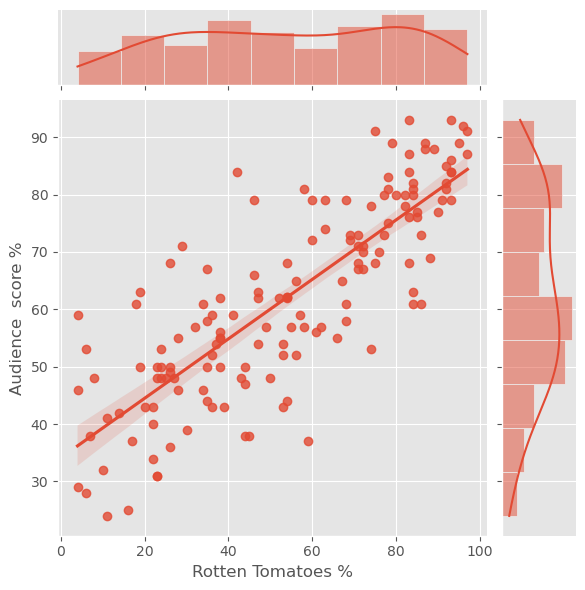

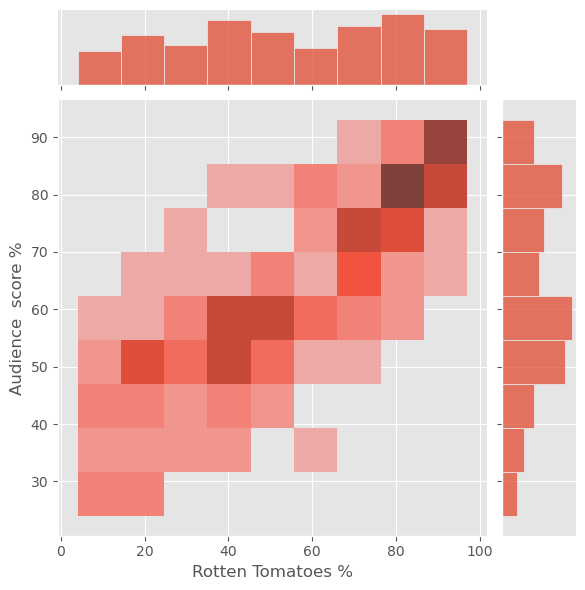

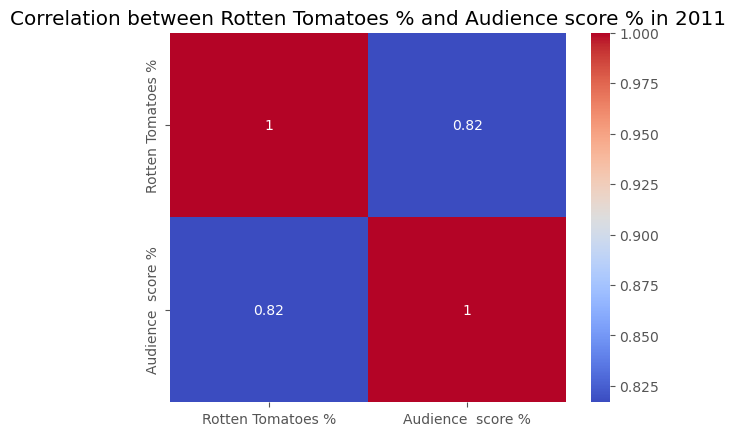

In [1106]:
data2011.columns
#Rotten Tomatoes %
#Audience  score %


#查看空值
data2011["Audience  score %"].isnull().sum()
data2011["Rotten Tomatoes %"].isnull().sum()

#去除两列数值中的的问号
data2011["Audience  score %"] = data2011["Audience  score %"].str.replace("?","",regex=True)

data2011["Rotten Tomatoes %"] = data2011["Rotten Tomatoes %"].str.replace("?","",regex=True)

#将空值替换为NaN
data2011["Audience  score %"] = data2011["Audience  score %"].replace("",np.nan)

data2011["Rotten Tomatoes %"] = data2011["Rotten Tomatoes %"].replace("",np.nan)

#查看空值
data2011["Audience  score %"].isnull().sum()
data2011["Rotten Tomatoes %"].isnull().sum()
#转换为数值型
data2011["Audience  score %"] = data2011["Audience  score %"].astype(float)

data2011["Rotten Tomatoes %"] = data2011["Rotten Tomatoes %"].astype(float)




#填充空值
data2011["Audience  score %"].fillna(data2011["Audience  score %"].mean(),inplace=True)

data2011["Rotten Tomatoes %"].fillna(data2011["Rotten Tomatoes %"].mean(),inplace=True)

#保留两位小数，确定更改
data2011["Audience  score %"] = data2011["Audience  score %"].round(2)

data2011["Rotten Tomatoes %"] = data2011["Rotten Tomatoes %"].round(2)





#计算相关系数

cor=data2011["Audience  score %"].corr(data2011["Rotten Tomatoes %"])

print(f"相关系数：{cor}")




sns.jointplot(x="Rotten Tomatoes %", y="Audience  score %", data=data2011, kind="reg")      #说明：kind="reg"表示绘制回归曲线

plt.show()


#分布的热力图
sns.jointplot(x="Rotten Tomatoes %", y="Audience  score %", data=data2011, kind="hist", marginal_kws={"rug": False})



plt.xlabel("Rotten Tomatoes %") 

plt.ylabel("Audience  score %")

plt.show()


#相关系数的热力图
sns.heatmap(data2011[["Rotten Tomatoes %", "Audience  score %"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Rotten Tomatoes % and Audience score % in 2011")
plt.show()





# 可视化结论
- 从可视化结果可以看出，这两个指标之间存在一定程度的正相关关系，即通常情况下 Rotten Tomatoes % 和 Audience score % 的得分趋势相似。但是，也有一些离群点存在，它们的得分在两个指标上有很大差异，可能是由于其他因素的影响（例如电影类型、导演等）。

# 热力图结论

- 由热力图可知，两个评分的相关系数约为0.82，说明两个评分的相关性较强，说明两个评分的标准相似程度较大。


### 第4题：请使用2007-2011年的数据，探索Profitablity（利润率，其值等于(Worldwide Gross-Budget)/Budget）可能的影响因素（变量）？（4分）

温馨提示：（1）选出你认为有关的变量，根据数据类型分析相关关系。  不一定要求全面，只需要按照你的喜好，选择几个点进行分析即可。（2）如果你认为不同年份的利润率不可以直接比，那你可能需要对利润率进行简单标准化，方法合理即可。


数据进行标准化和预处理

In [1107]:
# 列名列表
new_columns = ['Film', 'Lead Studio', 'Rotten Tomatoes', 'Audience score',
               'Story', 'Genre', 'Number of Theatres in US Opening Weekend',
               'Box Office Average per US Cinema (Opening Weekend)', 'Domestic Gross',
               'Foreign Gross', 'Worldwide Gross', 'Budget', 'Profitability',
               'Opening Weekend', 'Oscar', 'Bafta', 'Source']



selected_columns = ['Number of Theatres in US Opening Weekend','Box Office Average per US Cinema (Opening Weekend)','Domestic Gross',
               'Foreign Gross', 'Worldwide Gross', 'Budget',
               'Opening Weekend']



def calculate_profit(filename):
    data2 = pd.read_csv(filename)
    data=data2.copy()
    #预处理字段Worldwide Gross和Budget
    data.columns.values[0:17] = new_columns
    data = data.iloc[2:, 0:17]
    data = data[selected_columns]
    
    
    data["Worldwide Gross"] = data["Worldwide Gross"].str.replace(r"\(\$m\)", "", regex=True)
    data["Worldwide Gross"] = data["Worldwide Gross"].str.replace(",", "")
    data["Worldwide Gross"].replace('', float("nan")).astype(float)

    data["Budget"] = data["Budget"].apply(lambda x: str(x).replace("($m)", "").replace(",", ""))
    # data["Budget"] = data["Budget"].str.replace(r"\(\$m\)", "", regex=True)
    data["Budget"] = data["Budget"].str.replace(",", "")
    data["Budget"] = data["Budget"].str.replace("\$", "")
    data["Budget"].replace('', float("nan")).astype(float)

    #将字段Worldwide Gross和Budget转换为数值型且填充空值
    data["Worldwide Gross"] = pd.to_numeric(data["Worldwide Gross"], errors='coerce')
    data["Budget"] = pd.to_numeric(data["Budget"], errors='coerce')
    #计算利润
    profit = (data["Worldwide Gross"] - data["Budget"]) / data["Budget"]
    #标准化利润
    profit_norm = (profit - profit.mean()) / profit.std()

    return data, profit_norm
    


def calculate_profit1(data1):
    data = data1.copy()
    data.columns.values[0:17] = new_columns
    #去掉前两行
    data = data.iloc[2:, 0:17]
    data = data[selected_columns]
    
    #预处理字段Worldwide Gross和Budget
    data["Worldwide Gross"] = data["Worldwide Gross"].str.replace(r"\(\$m\)", "", regex=True)
    data["Worldwide Gross"] = data["Worldwide Gross"].str.replace(",", "")
    data["Worldwide Gross"].replace('', float("nan")).astype(float)
    


    data["Budget"] = data["Budget"].apply(lambda x: str(x).replace("($m)", "").replace(",", ""))

    # data["Budget"] = data["Budget"].str.replace(r"\(\$m\)", "", regex=True)
    data["Budget"] = data["Budget"].str.replace(",", "")
    data["Budget"] = data["Budget"].str.replace("\$", "")
    data["Budget"].replace('', float("nan")).astype(float)

    #将字段Worldwide Gross和Budget转换为数值型且填充空值
    data["Worldwide Gross"] = pd.to_numeric(data["Worldwide Gross"], errors='coerce')
    data["Budget"] = pd.to_numeric(data["Budget"], errors='coerce')
    #计算利润
    profit = (data["Worldwide Gross"] - data["Budget"]) / data["Budget"]
    #标准化利润
    profit_norm = (profit - profit.mean()) / profit.std()
    
    return data, profit_norm

def calculate_profit2(data3):
    data = data3.copy()
    data.columns.values[0:17] = new_columns
    #去掉前两行
    data = data.iloc[:, 0:17]
    data = data[selected_columns]
    
    #预处理字段Worldwide Gross和Budget
    data["Worldwide Gross"] = data["Worldwide Gross"].str.replace(r"\(\$m\)", "", regex=True)
    data["Worldwide Gross"] = data["Worldwide Gross"].str.replace(",", "")
    data["Worldwide Gross"].replace('', float("nan")).astype(float)
    


    data["Budget"] = data["Budget"].apply(lambda x: str(x).replace("($m)", "").replace(",", ""))

    # data["Budget"] = data["Budget"].str.replace(r"\(\$m\)", "", regex=True)
    data["Budget"] = data["Budget"].str.replace(",", "")
    data["Budget"] = data["Budget"].str.replace("\$", "")
    data["Budget"].replace('', float("nan")).astype(float)

    #将字段Worldwide Gross和Budget转换为数值型且填充空值
    data["Worldwide Gross"] = pd.to_numeric(data["Worldwide Gross"], errors='coerce')
    data["Budget"] = pd.to_numeric(data["Budget"], errors='coerce')
    #计算利润
    profit = (data["Worldwide Gross"] - data["Budget"]) / data["Budget"]
    #标准化利润
    profit_norm = (profit - profit.mean()) / profit.std()
    
    return data, profit_norm


data2009, Profit2009_norm = calculate_profit("Most Profitable Hollywood Stories - US 2009.csv")
data2010, Profit2010_norm = calculate_profit("Most Profitable Hollywood Stories - US 2010.csv")
# data2011, Profit2011_norm = calculate_profit("Most Profitable Hollywood Stories - US 2011.csv")

data2011_read=pd.read_csv("Most Profitable Hollywood Stories - US 2011.csv")
data2011, Profit2011_norm = calculate_profit2(data2011_read)





#比较异常的两年数据单独处理
data2007=pd.read_csv("Most Profitable Hollywood Stories - US 2007.csv")
data2008=pd.read_csv("Most Profitable Hollywood Stories - US 2008.csv")
data2007, Profit2007_norm = calculate_profit1(data2007)
data2008, Profit2008_norm = calculate_profit1(data2008)

Profit2008_norm =(data2008["Worldwide Gross"]/data2008["Budget"]-1)


data2007["Profit_norm"] = Profit2007_norm

data2008["Profit_norm"] = Profit2008_norm

data2009["Profit_norm"] = Profit2009_norm

data2010["Profit_norm"] = Profit2010_norm

data2011["Profit_norm"] = Profit2011_norm



合并2007-2011年的数据

In [1108]:
# 合并2007-2011年的数据
data = pd.concat([data2007, data2008, data2009, data2010, data2011], ignore_index=True)


可视化缺失值情况

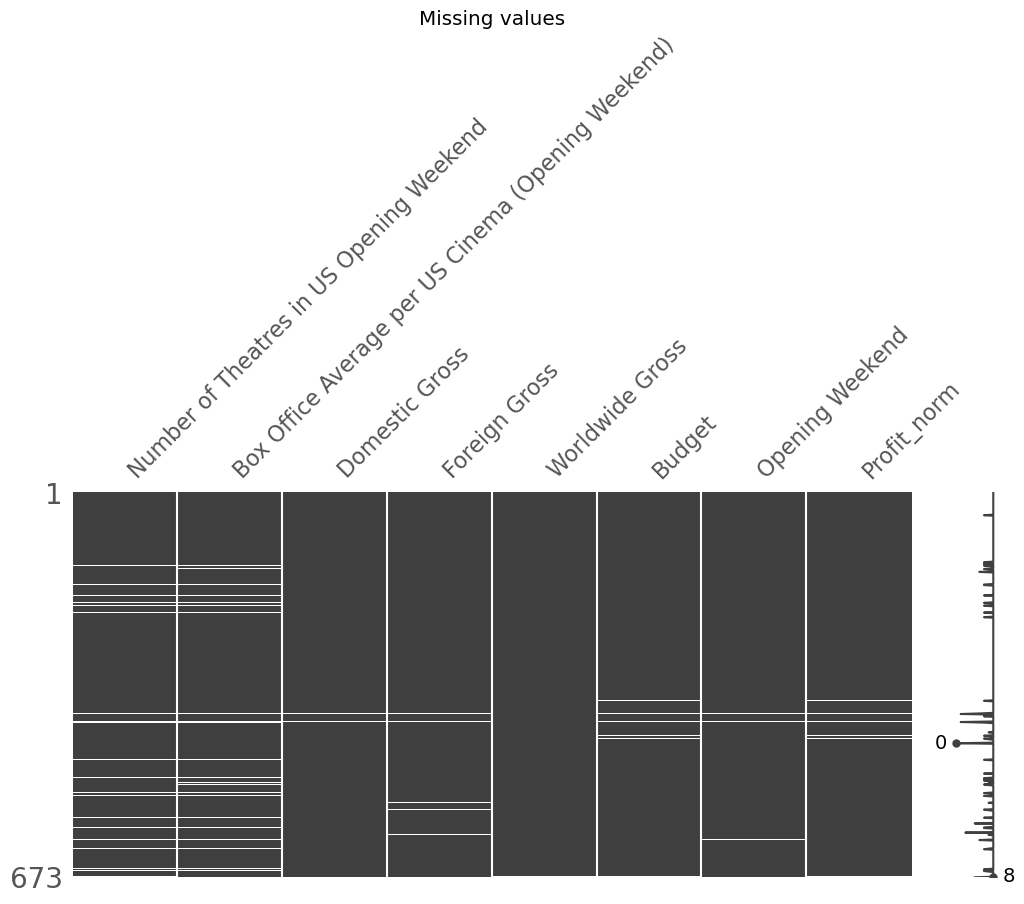

In [1109]:
import missingno as msno

#设置美观的图形风格
plt.style.use("ggplot")

msno.matrix(data, figsize=(12, 5))
#标题
plt.title("Missing values")
#显示图形
plt.show()


去掉最后一行

In [1110]:
# 去掉最后一行
data = data.iloc[:-1, :]


In [1111]:
# 查看空缺值
data.isnull().sum()


Number of Theatres in US Opening Weekend              34
Box Office Average per US Cinema (Opening Weekend)    40
Domestic Gross                                         4
Foreign Gross                                         10
Worldwide Gross                                        2
Budget                                                10
Opening Weekend                                        4
Profit_norm                                           11
dtype: int64

查看数据类型

In [1112]:
# 查看数据类型
data.dtypes


Number of Theatres in US Opening Weekend               object
Box Office Average per US Cinema (Opening Weekend)     object
Domestic Gross                                         object
Foreign Gross                                          object
Worldwide Gross                                       float64
Budget                                                float64
Opening Weekend                                        object
Profit_norm                                           float64
dtype: object

去除逗号

In [1113]:
# 处理第534行的第一列和第二列2,690	8,405	
data.iloc[534,0] = 2690
data.iloc[534,1] = 8405
#第252行第四列的2,023.00
data.iloc[252,3] = 2023


转换为数值型

In [1114]:
# Number of Theatres in US Opening Weekend 转换为数值型
data["Number of Theatres in US Opening Weekend"] = pd.to_numeric(data["Number of Theatres in US Opening Weekend"], errors='coerce')
#Box Office Average per US Cinema (Opening Weekend)转换为数值型
data["Box Office Average per US Cinema (Opening Weekend)"] = pd.to_numeric(data["Box Office Average per US Cinema (Opening Weekend)"], errors='coerce')
#Worldwide Gross 转换为数值型
data["Worldwide Gross"] = pd.to_numeric(data["Worldwide Gross"], errors='coerce')
#Foreign Gross 转换为数值型
data["Foreign Gross"] = pd.to_numeric(data["Foreign Gross"], errors='coerce')
#Domestic Gross  转换为数值型
data["Domestic Gross"] = pd.to_numeric(data["Domestic Gross"], errors='coerce')


#Opening Weekend转换为数值型
data["Opening Weekend"] = pd.to_numeric(data["Opening Weekend"], errors='coerce')



缺失值填充

In [1115]:
data = data.interpolate()

查看空缺值

In [1116]:
# 查看空缺值
data.isnull().sum()


Number of Theatres in US Opening Weekend              0
Box Office Average per US Cinema (Opening Weekend)    0
Domestic Gross                                        0
Foreign Gross                                         0
Worldwide Gross                                       0
Budget                                                0
Opening Weekend                                       0
Profit_norm                                           0
dtype: int64

In [1117]:
data.head()

,Number of Theatres in US Opening Weekend,Box Office Average per US Cinema (Opening Weekend),Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Opening Weekend,Profit_norm
0,3103.0,22844.0,210.61,245.45,456.07,65.0,70.9,0.955833
1,2652.0,5292.0,53.61,16.17,69.78,48.0,14.0,-0.576008
2,2855.0,5587.0,39.57,35.53,75.10,32.0,15.6,-0.330062
3,954.0,4009.0,24.34,5.02,29.37,45.0,3.8,-0.796608
4,2611.0,3853.0,41.80,87.09,128.88,40.0,10.0,-0.089073


分析不同变量和Profit_norm的相关程度

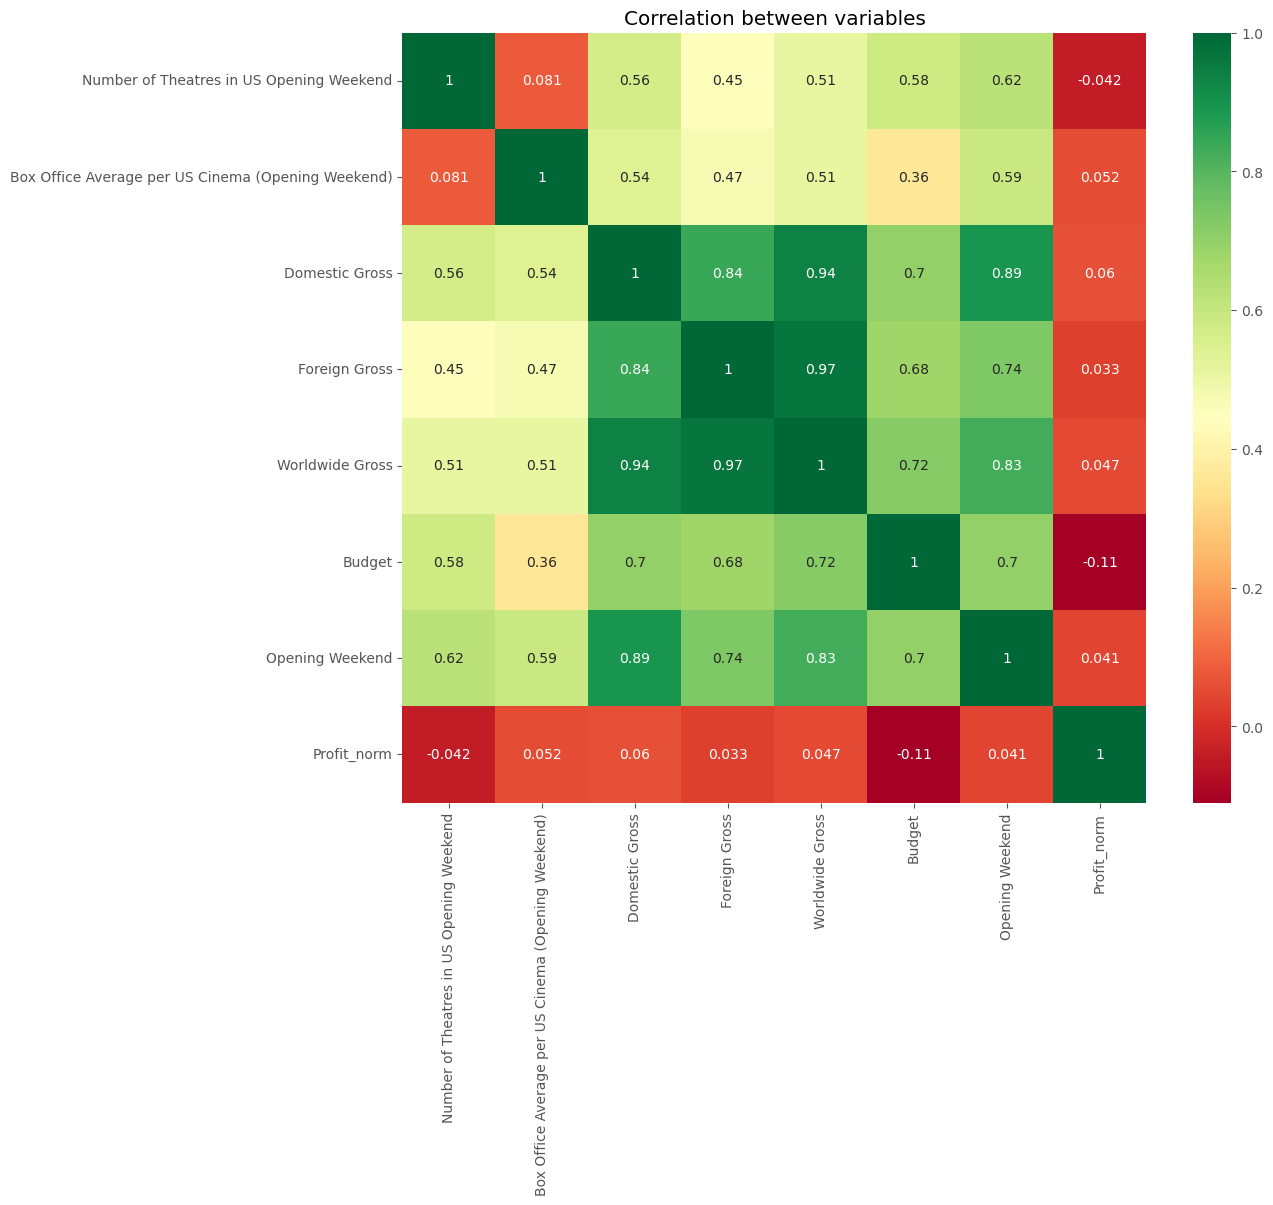

In [1118]:
#热力图
plt.figure(figsize=(12, 10))
#标题
plt.title("Correlation between variables")
#热力图
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
#显示图形
plt.show()



单独查看Profit_norm与其他变量的关系

In [1119]:
#单独查看Profit_norm与其他变量的关系
data.corr()["Profit_norm"].sort_values(ascending=False)

Profit_norm                                           1.000000
Domestic Gross                                        0.059653
Box Office Average per US Cinema (Opening Weekend)    0.052129
Worldwide Gross                                       0.047043
Opening Weekend                                       0.041146
Foreign Gross                                         0.033040
Number of Theatres in US Opening Weekend             -0.041721
Budget                                               -0.109814
Name: Profit_norm, dtype: float64

### 结论
- ##### 可以看出，变量整体上与标准化后的Profit相关性不是很高。相对来说，与标准化后的Profit相关性相对较高的变量主要有：Domestic Gross、Budget,Domestic Gorss成正相关，Budget成负相关，可以看出，Domestic Gross越高，Profit_norm越高，Budget越高，Profit_norm越低。由此推测，Domestic Gross和Budget是Profit_norm的相对重要的影响因素。简单理解，电影制作成本越高，电影的利润越低，电影的利润率越高，电影的利润越高。
- ##### 其次是Worldwide Gross、Box Office Average per US Cinema (Opening Weekend) 等，这些变量与Profit_norm的相关性相对较低，但是也有一定的相关性，可以看出，Worldwide Gross、Box Office Average per US Cinema (Opening Weekend)等变量与Profit_norm成正相关，可以看出，Worldwide Gross、Box Office Average per US Cinema (Opening Weekend)等变量越高，Profit_norm越高。

单独查看Domestic Gross和Profit_norm的关系

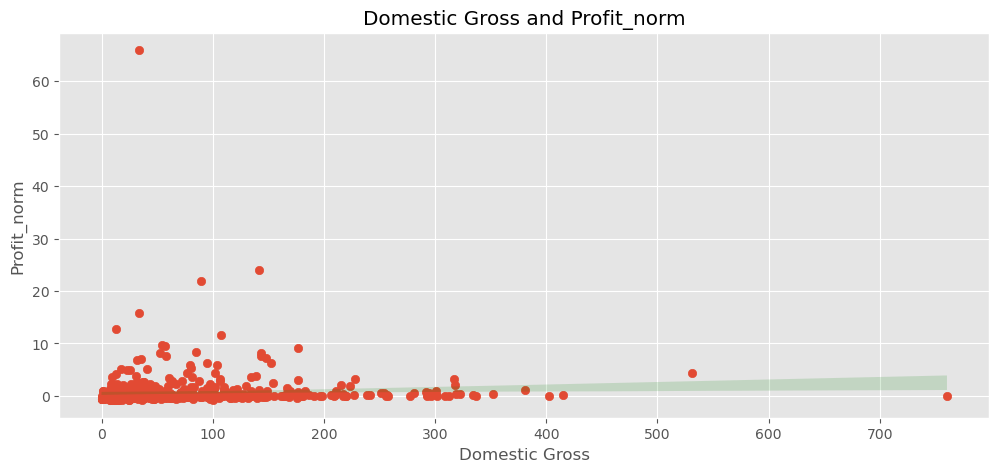

In [1120]:
#单独查看Domestic Gross和Profit_norm的关系
plt.figure(figsize=(12, 5))
#标题
plt.title("Domestic Gross and Profit_norm")
#散点图
plt.scatter(data["Domestic Gross"], data["Profit_norm"])
#拟合线
sns.regplot(data["Domestic Gross"], data["Profit_norm"], scatter=False, color="green")

#显示图形
plt.show()




## 结果解释
可以看出，拟合后的直线大概呈现斜率为正的现象，说明Domestic Gross和标准化的Profit呈现正相关

单独查看Budget和Profit_norm的关系

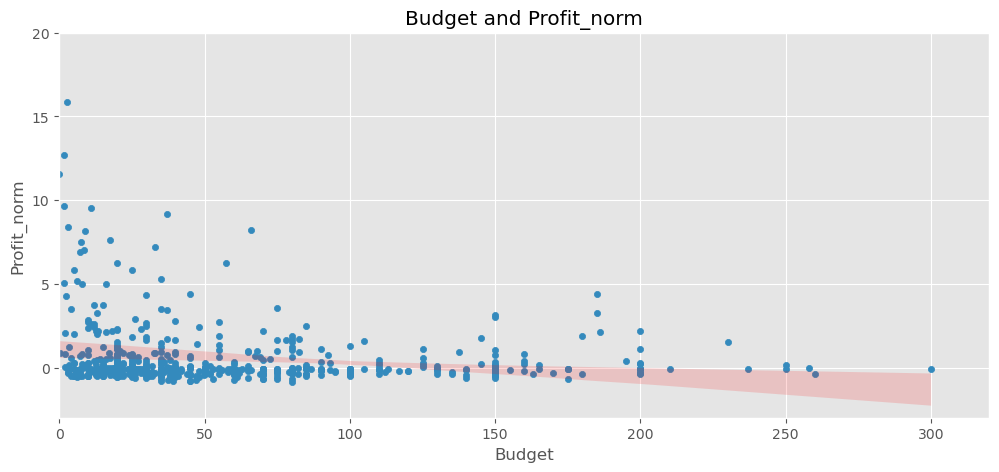

In [1121]:
# 单独查看Budget和Profit_norm的关系
data.plot(x="Budget", y="Profit_norm", kind="scatter", figsize=(12, 5))
#标题
plt.title("Budget and Profit_norm")
#调整x轴范围
plt.xlim(0, 320)
#线性拟合
sns.regplot(x="Budget", y="Profit_norm", data=data, scatter=False, color="red")
#调整y轴范围
plt.ylim(-3, 20)
#显示图形
plt.show()



joinplot查看Budget和Profit_norm的关系

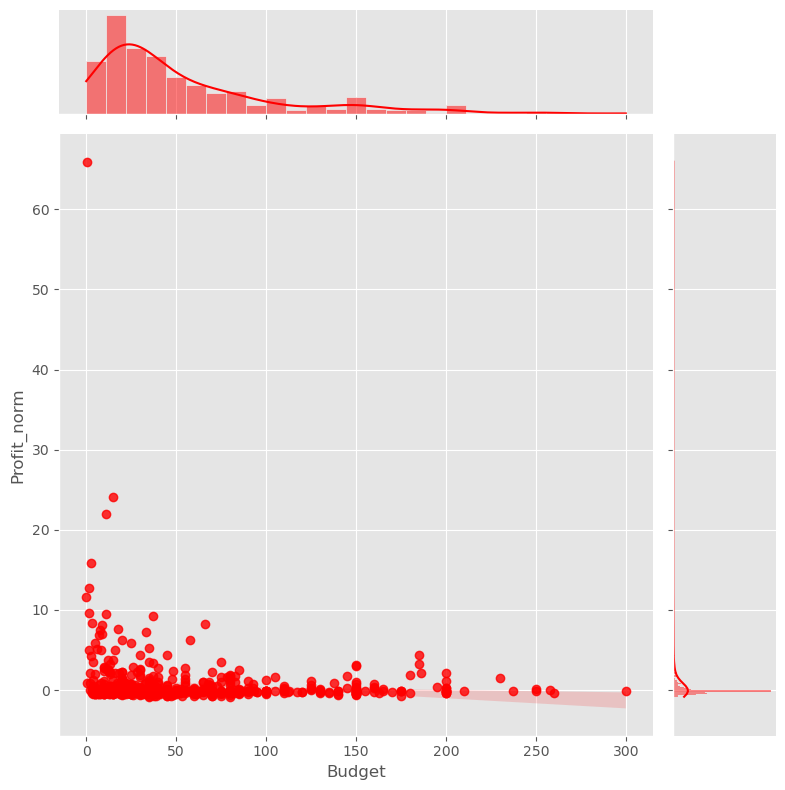

In [1122]:
#可视化单独查看Budget和Profit_norm的关系
sns.jointplot(x="Budget", y="Profit_norm", data=data, kind="reg", color="red", size=8)
#显示图形
plt.show()



# 结果解读
可以看出，拟合出的直线大概呈现斜率为负的情况，说明Budget和标准化的Profit呈现负相关


## 结论
可以看出，变量整体上与标准化后的Profit相关性不是很高,猜测可能是部分离群点的原因（和上部分讨论的长尾分布现象可能有关，部分收入极高的电影为离群点）。